In [23]:
import pandas as pd 

In [24]:
data = pd.read_csv('full_analysis.csv')
data.dropna(how='all',axis=0)
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('TAC\n', '')
#df = df.replace('\n',' ', regex=True)
data.head()
data.columns

Index(['Sample', 'Attempt', 'Deformation', 'Long', 'Short', 'Mechanism', 'EB',
       'SxIP', 'Kinesin'],
      dtype='object')

In [25]:
names = data.columns
names[1]

'Attempt'

In [26]:
data['Fraction_successful_tubes'] = data.apply(lambda row: row.Long / 
                                  (row.Attempt ), axis = 1) 

In [27]:
data_gro=data[['Attempt', 'Deformation', 'Long', 'Short', 'Mechanism',
       'EB', 'SxIP', 'Kinesin']].groupby(['Mechanism','EB','SxIP','Kinesin'],as_index=True).sum()
data_gro.describe()
data_gro

Attempt  Deformation  Long  Short
Mechanism EB    SxIP Kinesin                                   
K_pull    0.0   0    30            27           27  26.0    1.0
          200.0 0    15            35           35  35.0    0.0
                     30            13           13  13.0    0.0
                15   7             28           28  27.0    1.0
                     15            23           23  23.0    0.0
                     30            53           53  53.0    0.0
          220.0 0    15             1            1   1.0    0.0
K_pull\n  0.0   0    30             6            6   6.0    0.0
Sliding   0.0   0    30            33            0   0.0    0.0
          200.0 0    15            23            0   0.0    0.0
                     30             6            0   0.0    0.0
                15   7             10            1   0.0    0.0
                     15             8            5   3.0    0.0
                     30             2            2   2.0    0.0
Sliding_U 0.0   0    30             1            1   1.0    0.0
          200.0 0    15             1            1   1.0    0.0
                     30             7            7   7.0    0.0
TAC       0.0   0    30            15            7   7.0    0.0
          200.0 0    15            14           12  12.0    0.0
                     30             8            7   4.0    0.0
                15   7             45           35  31.0    1.0
                     15            36           29  27.0    2.0
                     30            21           15  15.0    0.0
TAC\n     0.0   0    30             1            1   1.0    0.0
dTAC      0.0   0    30             8            0   0.0    0.0
          200.0 0    15             1            0   0.0    0.0
                     30             2            0   0.0    0.0
                15   30             3            3   3.0    0.0

In [35]:
def fraction_tubes(data,column_name,):
    for items in column_name:
        data['FT_'+items] = data [items]/data['Attempt']
        #print (items)
    return data
        
    
    
data_gro=fraction_tubes(data_gro,['Long','Deformation'])
data=fraction_tubes(data,['Long','Deformation'])
#data_gro['Fraction_tubes_TAC'] = data_gro ['TAC']/data_gro.sum(axis=1)
data_gro


Attempt  Deformation  Long  Short   FT_Long  \
Mechanism EB    SxIP Kinesin                                                
K_pull    0.0   0    30            27           27  26.0    1.0  0.962963   
          200.0 0    15            35           35  35.0    0.0  1.000000   
                     30            13           13  13.0    0.0  1.000000   
                15   7             28           28  27.0    1.0  0.964286   
                     15            23           23  23.0    0.0  1.000000   
                     30            53           53  53.0    0.0  1.000000   
          220.0 0    15             1            1   1.0    0.0  1.000000   
K_pull\n  0.0   0    30             6            6   6.0    0.0  1.000000   
Sliding   0.0   0    30            33            0   0.0    0.0  0.000000   
          200.0 0    15            23            0   0.0    0.0  0.000000   
                     30             6            0   0.0    0.0  0.000000   
                15   7             10            1   0.0    0.0  0.000000   
                     15             8            5   3.0    0.0  0.375000   
                     30             2            2   2.0    0.0  1.000000   
Sliding_U 0.0   0    30             1            1   1.0    0.0  1.000000   
          200.0 0    15             1            1   1.0    0.0  1.000000   
                     30             7            7   7.0    0.0  1.000000   
TAC       0.0   0    30            15            7   7.0    0.0  0.466667   
          200.0 0    15            14           12  12.0    0.0  0.857143   
                     30             8            7   4.0    0.0  0.500000   
                15   7             45           35  31.0    1.0  0.688889   
                     15            36           29  27.0    2.0  0.750000   
                     30            21           15  15.0    0.0  0.714286   
TAC\n     0.0   0    30             1            1   1.0    0.0  1.000000   
dTAC      0.0   0    30             8            0   0.0    0.0  0.000000   
          200.0 0    15             1            0   0.0    0.0  0.000000   
                     30             2            0   0.0    0.0  0.000000   
                15   30             3            3   3.0    0.0  1.000000   

                              FT_Deformation  
Mechanism EB    SxIP Kinesin                  
K_pull    0.0   0    30             1.000000  
          200.0 0    15             1.000000  
                     30             1.000000  
                15   7              1.000000  
                     15             1.000000  
                     30             1.000000  
          220.0 0    15             1.000000  
K_pull\n  0.0   0    30             1.000000  
Sliding   0.0   0    30             0.000000  
          200.0 0    15             0.000000  
                     30             0.000000  
                15   7              0.100000  
                     15             0.625000  
                     30             1.000000  
Sliding_U 0.0   0    30             1.000000  
          200.0 0    15             1.000000  
                     30             1.000000  
TAC       0.0   0    30             0.466667  
          200.0 0    15             0.857143  
                     30             0.875000  
                15   7              0.777778  
                     15             0.805556  
                     30             0.714286  
TAC\n     0.0   0    30             1.000000  
dTAC      0.0   0    30             0.000000  
          200.0 0    15             0.000000  
                     30             0.000000  
                15   30             1.000000

<Figure size 360x216 with 0 Axes>

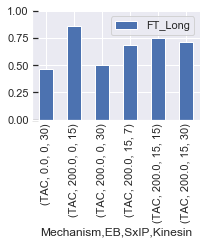

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(5, 3))
#sns.set(style="darkgrid")
#sns.barplot(data_gro[['FT_Long']],alpha=0.9)
#plt.bar(data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']])
datat=data_gro.loc[['TAC']]
datat
ax=datat[['FT_Long']].plot(kind='bar',ylim=(0,1),figsize=(3,2),rot=90,use_index=True,stacked=False,table=False)
#sns.barplot(datat[['FT_Long']],alpha=0.9)
ax.tick_params(left=True,direction='in')
sns.despine()
plt.savefig('TAC_probability.svg', dpi=300)
#plt.show()

In [10]:
data_gro=data[['Deformation', 'Long', 'Short', 'Mechanism',
       'EB', 'SxIP', 'Kinesin']].groupby(["Kinesin"]).count()
#data_gro.describe()
#data_gro.columns
#def fraction_tubes_t(data,column_name):
 #   for items in column_name:
  #      data_gro['FT_'+items] = data [items]/data.sum(axis=1)
        #print (items)
        
    
    
#fraction_tubes_t(data_gro,['TAC', 'dTAC', 'Sliding', 'Kinesin'])
#data_gro['Fraction_tubes_TAC'] = data_gro ['TAC']/data_gro.sum(axis=1)
data_gro

,Deformation,Long,Short,Mechanism,EB,SxIP
Kinesin,,,,,,
7,62,61,61,62,62,62
15,137,136,136,129,137,137
30,170,170,170,170,170,170


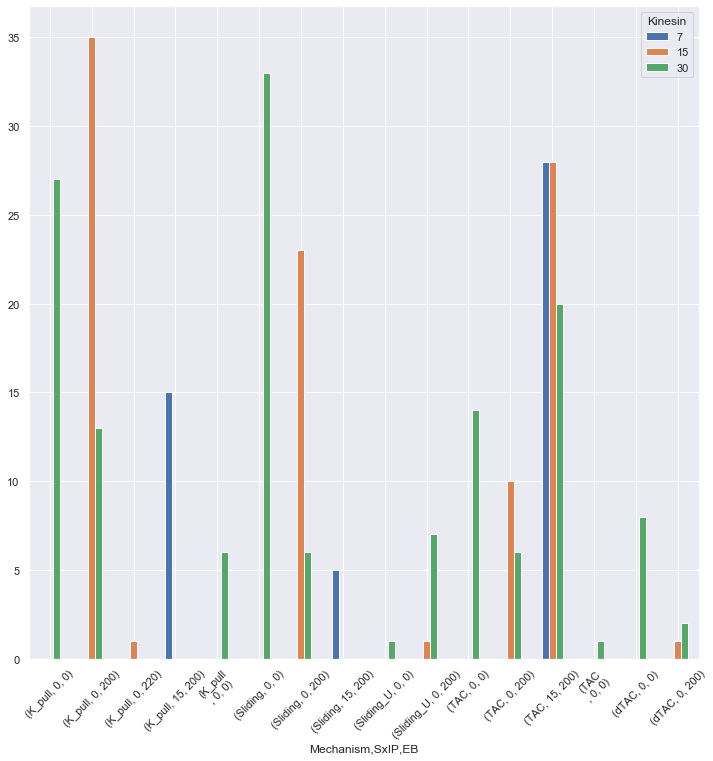

In [221]:
data.head()
#fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Mechanism','SxIP','EB','Kinesin']).count()['FT_Long'].unstack().plot(kind='bar',figsize=(12,12),rot=45,use_index=True,stacked=False,table=False)

In [222]:
datat

Attempt  Deformation  Long  Short   FT_Long  \
Mechanism EB  SxIP Kinesin                                                
TAC       0   0    30          15.0            7   7.0    0.0  0.466667   
          200 0    15          14.0           12  12.0    0.0  0.857143   
                   30           8.0            7   4.0    0.0  0.500000   
              15   7           41.0           30  26.0    4.0  0.634146   
                   15          34.0           29  28.0    1.0  0.823529   
                   30          20.0           14  14.0    0.0  0.700000   

                            FT_Deformation  
Mechanism EB  SxIP Kinesin                  
TAC       0   0    30             0.466667  
          200 0    15             0.857143  
                   30             0.875000  
              15   7              0.731707  
                   15             0.852941  
                   30             0.700000